# 02C: ZXColoration Circuit Generation

Construct a memory experiment circuit using the `zxcoloration` strategy with a BPC code.

- **Strategy used in this notebook:** `zxcoloration`
- **All `QldpcCode` by default supports `zxcoloration`.**
- Each syndrome extraction consists of 2 measurement rounds, one for Z checks and one for X checks. 

In [1]:
from quits.circuit import check_overlapping_CX
from quits import ErrorModel, CircuitBuildOptions
from quits.qldpc_code import BpcCode

In [2]:
# BPC parameters requested for this notebook
lift_size, factor = 6, 3
p1 = [0, 1, 2]
p2 = [0, 4, 5]

# Common circuit parameters
p = 1e-3
num_rounds = 15

error_model = ErrorModel(
    idle_error=p,
    sqgate_error=p,
    tqgate_error=p,
    spam_error=p,
)

circuit_build_options = CircuitBuildOptions(
    get_all_detectors=False,
    noisy_zeroth_round=True,
    noisy_final_meas=False,
)

In [3]:
# BPC code example
code = BpcCode(p1, p2, lift_size, factor)

In [4]:
# Build memory circuit with zxcoloration strategy
circuit = code.build_circuit(
    strategy="zxcoloration",
    error_model=error_model,
    num_rounds=num_rounds,
    basis="Z",
    circuit_build_options=circuit_build_options,
)

check_overlapping_CX(circuit)
print("Entangling depth:", code.depth)
print(circuit)

No overlapping CX gates found.
Entangling depth: 12
R 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
X_ERROR(0.001) 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
R 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
X_ERROR(0.001) 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
TICK
CX 24 36 34 40 29 41 7 47 35 53 4 38 23 44 16 50 15 51 19 52 28 46 14 49 2 37 31 43 6 42 30 48 33 39 11 45
DEPOLARIZE2(0.001) 24 36 34 40 29 41 7 47 35 53 4 38 23 44 16 50 15 51 19 52 28 46 14 49 2 37 31 43 6 42 30 48 33 39 11 45
DEPOLARIZE1(0.001) 0 1 3 5 8 9 10 12 13 17 18 20 21 22 25 26 27 32 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
TICK
CX 2 36 22 40 23 41 35 47 17 53 3 38 8 44 29 50 16 51 25 52 11 46 15 49 31 37 7 43 24 42 14 48 21 39 27 45
DEPOLARIZE2(0.001) 2 36 22 40 23 41 35 47 17 53 3 38 8 44 29 50 16 51 25 52 11 46 15 49 31 37 7 43 24 42 14 48 21 39 27 45
DEPOLARIZE1(0.001) 

### Tanner graph and edge coloration

In the Tanner graph, each parity-check interaction is an edge between a check qubit and a data qubit.

- Blue vertex: Data qubit
- Green vertex: Z-check qubit
- Purple vertex: X-check qubit

**Edge coloration** partitions these edges into color classes such that edges of the same color never share a vertex (a matching). The circuit executes one color class per CX layer.

Because no two same-color edges touch the same vertex, no qubit appears in more than one CX gate within that layer. This is exactly why edge coloration gives a conflict-free CX schedule (no overlapping CX gates).

You can verify this by running check_overlapping_CX(circuit), which should report no overlaps for a valid coloration schedule.

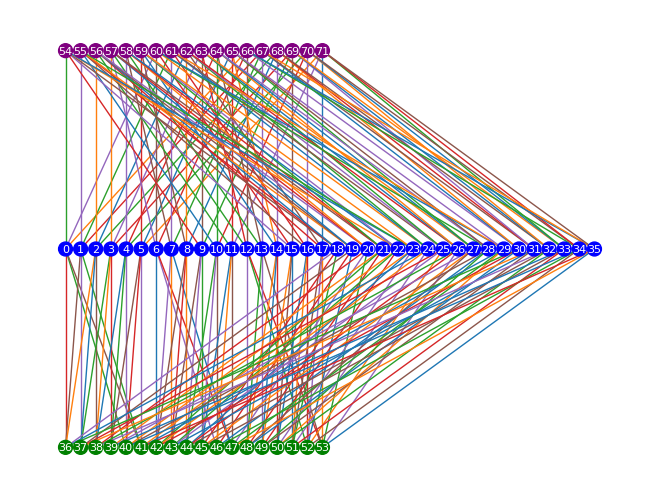

In [5]:
code.draw_graph(part='all')  # part can be 'all', 'z', or 'x'